<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/DL_Swedish_Auto_Insurance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/AutoInsurSweden.txt"

In [4]:
data = pd.read_csv(data_path,sep='\t')

In [5]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


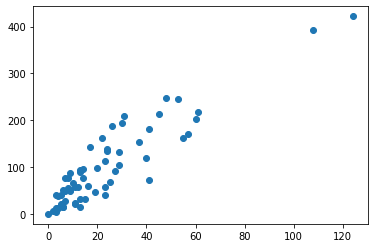

In [6]:
plt.scatter(data['X'],data['Y'])
plt.show()

In [7]:
#Statistical Symmary
description = data.describe()
print(description)

                X           Y
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000


In [8]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

          X         Y
X  1.000000  0.912878
Y  0.912878  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7510d51110>,
      dtype=object)

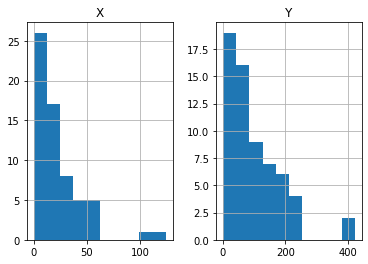

In [9]:
#Data Distribution
data.hist()


In [10]:
x = data[['X']]
y = data['Y']

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10,random_state =2)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential() #Create your base model
model.add(Dense(8,activation='relu')) #Add layer with 8 nodes
#model.add(Dropout(0.5))# Add 50% Dropout
model.add(Dense(3,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

import tensorflow as tf

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=10000, callbacks=[early_stop])

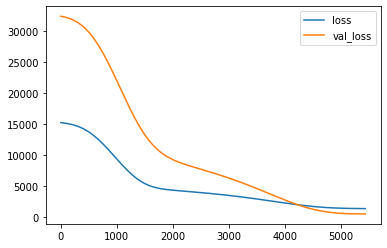

In [15]:
#Plotting the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

In [16]:
#MSE & RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))


18.732364382062638
22.25874784903956


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


MAE: 18.732364382062638
MSE: 495.45185580712314
RMSE: 22.25874784903956
VarScore: 0.9753270582176066


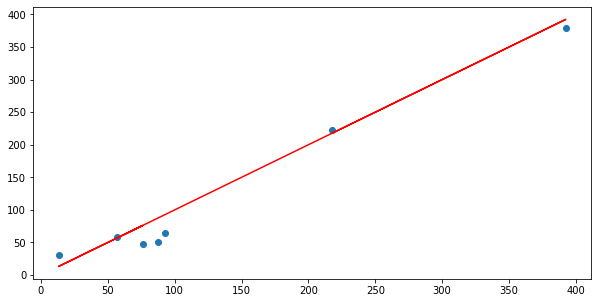

In [21]:
y_pred = model.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')